# 下载数据包


In [1]:
import  urllib.request
import os
data_url='http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls'
data_file_path='data/titanic3.xls'
if not os.path.isfile(data_file_path):
    result=urllib.request.urlretrieve(data_url,data_file_path)
    print('downloaded:',result)
else:
    print(data_file_path,'data file already exists.')

data/titanic3.xls data file already exists.


In [2]:
import numpy
import pandas as pd
#读取数据，结果为DataFrame格式
df_data=pd.read_excel(data_file_path)

# 筛选提取需要特征字段
survival 是否存在字段
筛选去需要特征字段，去掉ticket，cabin

In [3]:
# 筛选特征字段
selected_cols=['survived','name','pclass','sex','age','sibsp','parch','fare','embarked']
selected_df_data=df_data[selected_cols]

# 定义数据预处理

In [4]:
from sklearn import preprocessing
def prepare_data(df_data):
    df=df_data.drop(['name'],axis=1)
    age_mean=df['age'].mean()
    df['age']=df['age'].fillna(age_mean)
    fare_mean=df['fare'].mean()
    df['fare']=df['fare'].fillna(fare_mean)
    df['sex']=df['sex'].map({'female':0,'male':1}).astype(int)
    df['embarked']=df['embarked'].fillna('S')
    df['embarked']=df['embarked'].map({'C':0,'Q':1,'S':2}).astype(int)
    ndarray_data=df.values# 转换为ndarray数组
    features=ndarray_data[:,1:]
    label=ndarray_data[:,0]
    #特征值标准化
    minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
    norm_features=minmax_scale.fit_transform(features)
    return norm_features,label

# shuffle 打乱数据顺序，为后面训练做准备

In [5]:
# shuffle打乱数据顺序，通过pandas的抽样函数sample实现，frac为百分比
# selected_df_data数据保持不变
shuffled_df_data=selected_df_data.sample(frac=1)

# 得到处理后的数据集

In [6]:
x_data,y_data=prepare_data(shuffled_df_data)

# 划分训练集和测试集

In [7]:
train_size=int(len(x_data)*0.8)
x_train=x_data[:train_size]
y_train=y_data[:train_size]
x_test=x_data[train_size:]
y_test=y_data[train_size:]

# keras建模

In [8]:
import tensorflow as tf
# 建立keras序列模型
model=tf.keras.models.Sequential()

In [9]:
#加入第一层输入特征7列，也可以是input_shape=（7，）
model.add(tf.keras.layers.Dense(units=64,
                               input_dim=7,
                               use_bias=True,
                               kernel_initializer='uniform',
                               bias_initializer='zeros',
                               activation='relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
#model.add(tf.keras.layers.Dropout(rate=0.3))

In [11]:
model.add(tf.keras.layers.Dense(units=32,
                               activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
#model.add(tf.keras.layers.Dropout(rate=0.3))

In [13]:
model.add(tf.keras.layers.Dense(units=1,
                               activation='sigmoid'))

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


# 训练模型

In [15]:
#loss是损失函数名
# 用sigmoid作为激活函数，一般损失函数用binary_crossentropy
# 用softmax作为激活函数，一般损失函数用categorical_crossentropy
model.compile(optimizer=tf.keras.optimizers.Adam(0.03),
             loss='binary_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
# 设置回调函数
# tf.keras.callbacks.LearningRateScheduler()
#tf.keras.callbacks.EarlyStopping
logdir='.\\logs'
checkpoint_path='./checkpoint/Titanic.{epoch:02d}-{val_loss:2f}.ckpt'
callbacks=[
    tf.keras.callbacks.TensorBoard(log_dir=logdir,
                                  histogram_freq=2),
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                      save_weights_only=True,
                                      verbose=1,
                                      period=5)
    
]

In [17]:
#fit 做真正的训练
# x输入特征值
#y标签数据
#validation_split验证集占的比例
#verbose:训练过程显示取值0：不显示，1：带进度调模式，2每个epoch显示
# 返回值，过程历时对象，包含loss和acc数据
train_history=model.fit(x=x_train,
                       y=y_train,
                       validation_split=0.2,
                       epochs=100,
                       batch_size=40,
                        callbacks=callbacks,
                       verbose=1)

Train on 837 samples, validate on 210 samples
Epoch 1/100
837/837 [==============================] - 1s 991us/sample - loss: 0.5580 - acc: 0.7240 - val_loss: 0.4792 - val_acc: 0.7667
Epoch 2/100
837/837 [==============================] - 0s 272us/sample - loss: 0.4689 - acc: 0.7897 - val_loss: 0.4765 - val_acc: 0.7762
Epoch 3/100
837/837 [==============================] - 0s 442us/sample - loss: 0.4721 - acc: 0.7885 - val_loss: 0.4542 - val_acc: 0.8143
Epoch 4/100
837/837 [==============================] - 0s 289us/sample - loss: 0.4589 - acc: 0.7933 - val_loss: 0.4610 - val_acc: 0.7619
Epoch 5/100
720/837 [========================>.....] - ETA: 0s - loss: 0.4714 - acc: 0.7917
Epoch 00005: saving model to ./checkpoint/Titanic.05-0.445519.ckpt
837/837 [==============================] - 1s 2ms/sample - loss: 0.4657 - acc: 0.7957 - val_loss: 0.4455 - val_acc: 0.8095
Epoch 6/100
837/837 [==============================] - 0s 254us/sample - loss: 0.4770 - acc: 0.7861 - val_loss: 0.4591 - val

440/837 [==============>...............] - ETA: 0s - loss: 0.4324 - acc: 0.8000
Epoch 00050: saving model to ./checkpoint/Titanic.50-0.420479.ckpt
837/837 [==============================] - 1s 773us/sample - loss: 0.4169 - acc: 0.8148 - val_loss: 0.4205 - val_acc: 0.8095
Epoch 51/100
837/837 [==============================] - 0s 374us/sample - loss: 0.4245 - acc: 0.8196 - val_loss: 0.4100 - val_acc: 0.8143
Epoch 52/100
837/837 [==============================] - 0s 254us/sample - loss: 0.4124 - acc: 0.8172 - val_loss: 0.4115 - val_acc: 0.8095
Epoch 53/100
837/837 [==============================] - 1s 663us/sample - loss: 0.4193 - acc: 0.8136 - val_loss: 0.4085 - val_acc: 0.8048
Epoch 54/100
837/837 [==============================] - 0s 466us/sample - loss: 0.4115 - acc: 0.8208 - val_loss: 0.4079 - val_acc: 0.8048
Epoch 55/100
680/837 [=======================>......] - ETA: 0s - loss: 0.4299 - acc: 0.8044
Epoch 00055: saving model to ./checkpoint/Titanic.55-0.409594.ckpt
837/837 [=======

Epoch 99/100
837/837 [==============================] - 0s 369us/sample - loss: 0.3984 - acc: 0.8256 - val_loss: 0.4294 - val_acc: 0.7857
Epoch 100/100
560/837 [===================>..........] - ETA: 0s - loss: 0.3952 - acc: 0.8125
Epoch 00100: saving model to ./checkpoint/Titanic.100-0.430910.ckpt
837/837 [==============================] - 1s 704us/sample - loss: 0.3930 - acc: 0.8148 - val_loss: 0.4309 - val_acc: 0.8095


model.fit()返回一个history对象，该对象包含一个字典，其中包含训练期间所有情况

In [18]:
train_history.history

{'loss': [0.5579911396352478,
  0.4688593656216329,
  0.4720932124905831,
  0.4589468238601548,
  0.4657484563234459,
  0.4770127247168884,
  0.4518154235367564,
  0.4538560429923993,
  0.46968690668240526,
  0.4421916669913375,
  0.445420704007576,
  0.44953654174166624,
  0.45314810235440517,
  0.4599493030934921,
  0.44369399704243834,
  0.44294807816919035,
  0.43772351065274495,
  0.4352135008986563,
  0.43492287397384644,
  0.4358134263305254,
  0.4423910667819361,
  0.439537002977647,
  0.4396447104222743,
  0.4365814348133092,
  0.4281803080756462,
  0.4324358625152775,
  0.43068693676160086,
  0.4279882072191797,
  0.437237203922323,
  0.4276607395856326,
  0.42592096859266537,
  0.4352967923544926,
  0.4278652539817236,
  0.42960794492576854,
  0.42917980878583845,
  0.42908630921564367,
  0.4323552481233718,
  0.429559542714054,
  0.43092088342567497,
  0.419474073778059,
  0.42423845259661885,
  0.41563475053655063,
  0.42402823178571614,
  0.42584151214738614,
  0.43026091

In [19]:
train_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# 训练过程可视化

In [20]:
import matplotlib.pyplot as plt
def visu_train_history(train_history,train_metric,validation_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[validation_metric])
    plt.title('train history')
    plt.ylabel(train_metric)
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

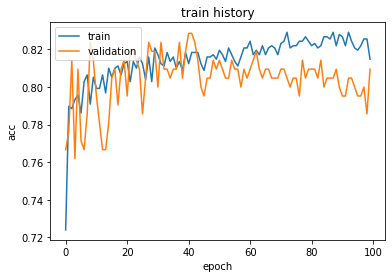

In [21]:
visu_train_history(train_history,'acc','val_acc')

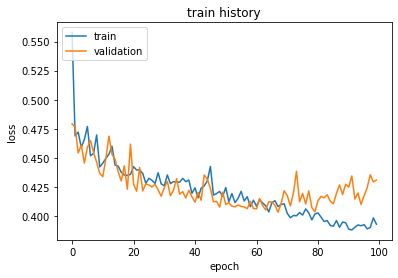

In [22]:
visu_train_history(train_history,'loss','val_loss')

# 模型评估

In [23]:
evaluate_result=model.evaluate(x=x_test,y=y_test)

262/262 [==============================] - 0s 137us/sample - loss: 0.5144 - acc: 0.7786


In [24]:
evaluate_result

[0.5144248318126183, 0.77862597]

In [25]:
model.metrics_names

['loss', 'acc']

# 模型应用预测Rose和Jack的生存概率


In [26]:
#添加旅客信息
selected_cols

['survived',
 'name',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked']

In [27]:
# Jack和Rose的旅客信息
Jack_info=[0,'Jack',3,'male',23,1,0,5.0000,'S']
Rose_info=[1,'Rose',1,'female',20,1,0,100.0000,'S']

In [28]:
#创建新的旅客DataFrame
new_passenger_pd=pd.DataFrame([Jack_info,Rose_info],columns=selected_cols)

In [29]:
# 在老的DataFrame中加入新的旅客信息
all_passenger_pd=selected_df_data.append(new_passenger_pd)

In [30]:
all_passenger_pd.shape

(1311, 9)

In [31]:
all_passenger_pd[-3:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
1308,0,"Zimmerman, Mr. Leo",3,male,29.0,0,0,7.875,S
0,0,Jack,3,male,23.0,1,0,5.000,S
1,1,Rose,1,female,20.0,1,0,100.000,S


In [32]:
# 数据准备
x_features,y_label=prepare_data(all_passenger_pd)

In [33]:
x_features.shape
all_passenger_pd.shape

(1311, 9)

In [34]:
# 利用模型计算生存率
surv_probability=model.predict(x_features)

In [35]:
surv_probability[:5]

array([[0.9937129 ],
       [0.98748326],
       [0.5888449 ],
       [0.23293498],
       [0.8706553 ]], dtype=float32)

In [36]:
# 在数据最后一列插入生存概率
all_passenger_pd.insert(loc=len(all_passenger_pd.columns),column='surv_probability',value=surv_probability)

In [37]:
all_passenger_pd[-5:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,surv_probability
1306,0,"Zakarian, Mr. Mapriededer",3,male,26.5,0,0,7.225,C,0.199737
1307,0,"Zakarian, Mr. Ortin",3,male,27.0,0,0,7.225,C,0.198812
1308,0,"Zimmerman, Mr. Leo",3,male,29.0,0,0,7.875,S,0.120949
0,0,Jack,3,male,23.0,1,0,5.000,S,0.123105
1,1,Rose,1,female,20.0,1,0,100.000,S,0.996668


In [38]:
surv_probability.shape


(1311, 1)

In [39]:
all_passenger_pd.shape

(1311, 10)

In [40]:
x_features.shape

(1311, 7)